# Macroscopic body Green's tensor

The presence of a macroscopic body in the space surrounding an atom shifts the energy levels of the atom and modifies the spontaneous emission of said atom. In order to understand the coupling of the atom to the macroscopic object we use the Green's tensor method. IN which, we decompose the EM field produced at a point in space $\vec{r}$ at time $t$ produced by a source at $\vec{r}'$ at time $t'=0$. This tensor can be decomposed as:

$\pmb{G}(\vec{r}, \vec{r}', \omega) = \pmb{G}_0(\vec{r}, \vec{r}', \omega) + \pmb{G}_{sc}(\vec{r}, \vec{r}', \omega)$

Where $\pmb{G}_0 $ is the Green's tensor of a homogeneous medium (vacuum) and $\pmb{G}_{sc}$ is the scattering due to the presence of the nanofiber.

$\pmb{G}_0 = \displaystyle \frac{-\delta(\vec{r} - \vec{r}')}{3k_2^2} \pmb{1} + \displaystyle \frac{e^{ik_2R}}{4\pi R}\left[ \left(1 + \displaystyle \frac{ik_2R}{k_2^2 R^2}\right)\pmb{1} + \displaystyle \frac{3 - 3ik_2R - k_2^2 R^2}{k_2^2 R^2} (\vec{r}\otimes \vec{r}')\right] $ 

$R = |\vec{r} - \vec{r}'|$, $\otimes$ : tensor product

$k_2^2 = \displaystyle \frac{\omega^2}{c^2}$ wave vector norm in the vacuum.

There is a divergence of the Green's tensor for $\vec{r} = \vec{r}'$ ($R=0$).


**Question** : Where does this Self term come from?

In [1]:
import scipy
import cmath
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
def _G0(r_vect, r_s, w):
    
    """
    w = pulsation
    r_vect = position to calculate the field vector in cylindrical coordinates
    r_s = position vector of the source in cylindrica coordinates
    
    """
    
    k = w  #c = 1
    
    #cylindrical coordinates
    (r, phi, z) = r_vect
    (rs, phis, zs) = r_s
    
    #Cartesian coordinates
    x, y, z = [r*cos(phi), r*sin(phi), z]
    xs, ys, zs = [rs*cos(phis), rs*sin(phis), zs]
    
    Delta_R = r_vect - r_s #distance
    R = np.sqrt((x-xs)**2 + (y-ys)**2 + (z-zs)**2)
    #print(R)
    
    RR = 1/R**2 * np.array([[(x-xs)**2, (x-xs)*(y-ys), (x-xs)*(z-zs)], 
                            [(y-ys)*(x-xs), (y-ys)**2, (y-ys)*(z-zs)], 
                            [(z-zs)*(x-xs), (y-ys)*(z-zs), (z-zs)**2]])
    
    
    if R == 0:
        
        #print("Divergence") 
        G0 = k/(6*pi)*np.identity(3) #Self term
        
    else:
        
        #print("No divergence")  
        G0 = cmath.exp(1j*k*R)/(4*pi*R)*((1 + (1j*k*R)/(k*R)**2) * np.identity(3) \
                                    + ((3-3*1j*k*R-(k*R)**2)/(k*R)**2) * RR)
        
    return G0

For $r > a$  and  $r' > a$, with $a$ the nanofiber's radius:

$\pmb{G}_{sc}(\vec{r}, \vec{r}', \omega) = \displaystyle \frac{i}{8\pi}\sum_{\nu = -\infty}^{\infty}\int_{-\infty}^{\infty} \displaystyle \frac{d\beta}{\eta_2^2} \left\{ \left[A_R \vec{M}_{\nu}(\beta, \vec{r}) + B_R \vec{N}_{\nu}(\beta, \vec{r}) \right]\vec{M}_{\nu}^{*}(\beta, \vec{r}') + \left[ C_R \vec{N}_{\nu}(\beta, \vec{r}) + D_R\vec{M}_{\nu}(\beta, \vec{r}) \right]\vec{N}_{\nu}^{*}(\beta, \vec{r}')\right\}$

where $\eta_2 = \sqrt{k_2^2-\beta^2}$

$\beta$ : projection of $\vec{k}$ over the nanofiber's axis.

$|\beta| = \displaystyle \frac{\omega}{c} cos(\theta_0)$

In [3]:
#%% Integrand

def IGA(nu, beta, k1, k2, r_vect, r_s, a=1):
    
    Eta1 = a*np.emath.sqrt(k1**2 - beta**2)
    Eta2 = a*np.emath.sqrt(k2**2 - beta**2) #complex for guided modes
    k1 = k1*a
    k2 = k2*a
    
    r_vect = r_vect/a
    r_obs = r_s/a
    
    [AR, BR, CR] = scalar_coeffs(nu, a*beta, Eta1, Eta2, k1, k2)
    
    [M1, N1, M_conj1, N_conj1] = Vector_field_coeffs(r_vect, r_s, nu, beta, Eta2)
    
    term1 = (AR*M1 + BR*N1)
    term2 = (CR*N1 + BR*M1)
    
    Int_GA = (1j/(8*pi*Eta2**2)) * (np.outer(term1, M_conj1)
                                  + np.outer(term2, N_conj1))
        
    return Int_GA

## Vector coefficients

$\vec{M}_{\nu}, \vec{N}_{\nu}$ are vector wavefunctions and $A_R, C_R, B_R = D_R$ some scalar coefficients determined with EM field continuity relations on the surface of the fiber.


\begin{align}
\vec{M}_{\nu}(\beta, \vec{r}) & = \left[ \displaystyle \frac{i\nu}{r} H_{\nu}^{(1)}(\eta r)\vec{e_r} - \eta H_{\nu}^{'(1)}(\eta r) \vec{e_{\varphi}}\right] e^{i(\nu \varphi + \beta z)}\\
\vec{N}_{\nu}(\beta, \vec{r}) & =  \displaystyle \frac{1}{\sqrt{\eta^2 + \beta^2}} \left[ i \beta \eta H_{\nu}^{'(1)}(\eta r) \vec{e_r} - \displaystyle \frac{\nu\beta}{r} H_{\nu}^{(1)}(\eta r)\vec{e_{\varphi}} + \eta^2 H_{\nu}^{(1)}(\eta r)\vec{e_z} \right] e^{i(\nu \varphi + \beta z)} \\
\vec{M}_{\nu}^{*}(\beta, \vec{r}) & = \left[ \displaystyle -\frac{i\nu}{r} H_{\nu}^{(1)}(\eta r)\vec{e_r} - \eta H_{\nu}^{'(1)}(\eta r) \vec{e_{\varphi}}\right] e^{-i(\nu \varphi + \beta z)} \\
\vec{N}_{\nu}^{*}(\beta, \vec{r}) & =  \displaystyle \frac{1}{\sqrt{\eta^2 + \beta^2}} \left[ -i \beta \eta H_{\nu}^{'(1)}(\eta r) \vec{e_r} - \displaystyle \frac{\nu\beta}{r} H_{\nu}^{(1)}(\eta r)\vec{e_{\varphi}} \eta^2 H_{\nu}^{(1)}(\eta r)\vec{e_z}\right] e^{-i(\nu \varphi + \beta z)} \\
\end{align}


To make the coefficients dimentionless $\bar{r} = r/a$, $\bar{\eta} = a \eta$, $\bar{\beta} = a \beta$

\begin{align}
\vec{M}_{\nu}(\beta, \vec{r}) & = a\left[ \displaystyle \frac{i\nu}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta} \bar{r})\vec{e_r} - \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta} \bar{r}) \vec{e_{\varphi}}\right] e^{i(\nu \varphi + \beta z)}\\
\vec{N}_{\nu}(\beta, \vec{r}) & = \displaystyle \frac{1}{a\sqrt{\bar{\eta}^2 + \bar{\beta}^2}} \left[ i \bar{\beta} \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta}\bar{r}) \vec{e_r} - \displaystyle \frac{\nu\bar{\beta}}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_{\varphi}} + \bar{\eta}^2 H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_z} \right] e^{i(\nu \varphi + \beta z)} \\
\vec{M}_{\nu}^{*}(\beta, \vec{r}) & = a \left[ \displaystyle -\frac{i\nu}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta} \bar{r})\vec{e_r} - \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta} \bar{r}) \vec{e_{\varphi}}\right] e^{-i(\nu \varphi + \beta z)} \\
\vec{N}_{\nu}^{*}(\beta, \vec{r}) & = \displaystyle \frac{1}{a\sqrt{\bar{\eta}^2 + \bar{\beta}^2}} \left[ -i \bar{\beta} \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta}\bar{r}) \vec{e_r} - \displaystyle \frac{\nu\bar{\beta}}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_{\varphi}} + \bar{\eta}^2 H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_z} \right] e^{-i(\nu \varphi + \beta z)} \\
\end{align}


In [4]:
#%% Vector fields

def Vector_field_coeffs(r_vect, r_s, nu, beta, eta, a=1): # -> 4 vectors of size (3, 1)
    
    """
    nu = mode
    beta = integration point in the real line (physically: propagation direction)
    r_vect = position to calculate the field vector in cartesian coordinates
    r_s = position vector of the source in cartesian coordinates
    
    """
    # Observation vector cartesian
    (x, y, z) = r_vect
    
    r = np.sqrt(x**2 + y**2) #distance from axis
    phi = asin(y/r) #angle
    
    #r, phi, z = r_vect #cylindrical
    
    er = np.array([cos(phi), sin(phi), 0]) #radial unity vector
    ephi = np.array([-sin(phi), cos(phi), 0]) #angular unity vector
    ez = np.array([0, 0, 1]) #axis unity vector
    
    Hn = scipy.special.hankel1(nu, eta*r)
    Hn_prime = scipy.special.h1vp(nu, eta*r)
    
    #Source vector
    (xs, ys, zs) = r_s
    
    rs = np.sqrt(xs**2 + ys**2) #distance from axis 
    phi_s = asin(ys/rs) #angle
    
    #rs, phi_s, zs = r_s
    
    er_s = np.array([cos(phi_s), sin(phi_s), 0]) #radial unity vector
    ephi_s = np.array([-sin(phi_s), cos(phi_s), 0]) #angular unity vector
    ez_s = np.array([0, 0, 1]) #axis unity vector
    
    Hn_s = scipy.special.hankel1(nu, eta*rs)
    Hn_prime_s = scipy.special.h1vp(nu, eta*rs)
    
    M = a*((1j*nu/r)*Hn*er - eta*Hn_prime*ephi) * cmath.exp(1j*(nu*phi + beta*z))
    
    N = (1/a)*(1/cmath.sqrt(eta**2 + beta**2)) * (1j*eta*beta*Hn_prime*er - (nu*beta/r)*Hn*ephi + eta**2*Hn*ez) * cmath.exp(1j*(nu*phi + beta*z))
    
    M_conj = a*((-1j*nu/rs)*Hn_s*er_s - eta*Hn_prime_s*ephi_s) * cmath.exp(-1j*(nu*phi_s + beta*zs))
    
    N_conj = (1/a)*(1/cmath.sqrt(eta**2 + beta**2)) * (-1j*eta*beta*Hn_prime_s*er_s - (nu*beta/rs)*Hn_s*ephi_s + eta**2*Hn_s*ez_s) * cmath.exp(-1j*(nu*phi_s + beta*zs))
    
    return [M, N, M_conj, N_conj]

In [5]:
Vector_field_coeffs(np.array([1, 0, 1]), np.array([1, 0, 1]), nu = 0, beta = 1, eta = 1)

[array([0.        +0.j        , 0.89512827-0.05180129j,
        0.        +0.j        ]),
 array([-0.03662904-0.63295127j,  0.        +0.j        ,
         0.2398311 +0.48901885j]),
 array([ 0.        +0.j        , -0.41960758-0.79238089j,
         0.        +0.j        ]),
 array([0.5602979 -0.29670736j, 0.        +0.j        ,
        0.34485863-0.42158145j])]

In [6]:
def  MN(nu, eta, beta, r_vect):
    
    """"
    nu = mode
    beta = integration point in the real line (physically: propagation direction)
    r_vect = position to calculate the field vector in cartesian coordinates
    """
    
    #Cartesian coordinates
    (x, y, z) = r_vect
    
    r = sqrt(x**2 + y**2) #distance from axis
    phi = asin(y/r) #angle
    
    er = np.array([cos(phi), sin(phi), 0]) #radial unity vector
    ephi = np.array([-sin(phi), cos(phi), 0]) #angular unity vector
    ez = np.array([0, 0, 1]) #axis unity vector
    
    Hn = scipy.special.hankel1(nu, eta*r)
    Hn_prime = scipy.special.h1vp(nu, eta*r)
    
    M = (1j*nu/r*Hn*er - eta*Hn_prime*ephi) * cmath.exp(1j*nu*phi+1j*beta*z)
    
    N = 1/cmath.sqrt(eta**2+beta**2) * (1j*beta*eta*Hn_prime*er - nu*beta/r*Hn*ephi + eta**2*Hn*ez) * cmath.exp(1j*nu*phi+1j*beta*z)

    return [M, N]

print(MN(0, 1, 1, np.array([1, 0, 1])), "\n")

def MbNb(nu, eta, beta, r_vect):
    
    """"
    nu = mode
    beta = integration point in the real line (physically: propagation direction)
    r_vect = position to calculate the field vector in cartesian coordinates
    """
    
    #Cartesian coordinates
    (x, y, z) = r_vect
    
    r = sqrt(x**2 + y**2) #distance from axis
    phi = asin(y/r) #angle
    
    er = np.array([cos(phi), sin(phi), 0]) #radial unity vector
    ephi = np.array([-sin(phi), cos(phi), 0]) #angular unity vector
    ez = np.array([0, 0, 1]) #axis unity vector
    
    Hn = scipy.special.hankel1(nu, eta*r)
    Hn_prime = scipy.special.h1vp(nu, eta*r)
    
    Mconj = (-1j*nu/r*Hn*er - eta*Hn_prime*ephi ) * cmath.exp(-1j*nu*phi-1j*beta*z)
    Nconj = 1/sqrt(eta**2+beta**2) * (-1j*beta*eta*Hn_prime*er - nu*beta/r*Hn*ephi + eta**2*Hn*ez) * cmath.exp(-1j*nu*phi-1j*beta*z)
    
    return [Mconj, Nconj]

print(MbNb(0, 1, 1, np.array([1, 0, 1])))


[array([0.        +0.j        , 0.89512827-0.05180129j,
       0.        +0.j        ]), array([-0.03662904-0.63295127j,  0.        +0.j        ,
        0.2398311 +0.48901885j])] 

[array([ 0.        +0.j        , -0.41960758-0.79238089j,
        0.        +0.j        ]), array([0.5602979 -0.29670736j, 0.        +0.j        ,
       0.34485863-0.42158145j])]


## Scalar coefficients

\begin{align}
A_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)} \left[ \displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{J_{\nu}^{'}(\eta_2 a)}{\eta_2 J_{\nu}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right)\right] \\
C_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)}  \left[\displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 J_{\nu}^{'}(\eta_2 a)}{\eta_2 J_{\nu}(\eta_2 a)}  \right) \right]\\
B_R = D_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)} \displaystyle \frac{\nu \beta}{a} \frac{k_2}{\eta_2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right) \left( \frac{J_{\nu}^{'}(\eta_2 a)}{J_{\nu}(\eta_2 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)}  \right) \\
\end{align}

To make these coefficients dimentionless : $\bar{r} = r/a$, $\bar{\eta} = a \eta$, $\bar{\beta} = a \beta$ ans $\bar{k} = a k $

\begin{align}
A_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta_2})}{H_{\nu}^{(1)}(\bar{\eta_2})} \left[ (\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} -  \frac{1}{\bar{\eta}_1^2} \right)^2 - \left( \frac{J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{J_{\nu}^{'}(\bar{\eta_2})}{\bar{\eta}_2 J_{\nu}(\bar{\eta_2})}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{\bar{k}_2^2 H_{\nu}^{'(1)}(\bar{\eta_2})}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta_2})}  \right)\right] \\
C_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta}_2)}{H_{\nu}^{(1)}(\bar{\eta}_2)}  \left[(\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} -  \frac{1}{\bar{\eta}_1^2} \right)^2   - \left( \frac{J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{H_{\nu}^{'(1)}(\bar{\eta_2})}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta_2})}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{\bar{k}_2^2 J_{\nu}^{'}(\bar{\eta_2})}{\bar{\eta}_2 J_{\nu}(\bar{\eta_2})}  \right) \right]\\
B_R = D_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta}_2)}{H_{\nu}^{(1)}(\bar{\eta}_2)}\nu \bar{\beta} \frac{\bar{k}_2}{\bar{\eta}_2} \left( \frac{1}{\bar{\eta}_2^2} - \frac{1}{\bar{\eta}_1^2} \right) \left( \frac{J_{\nu}^{'}(\bar{\eta_2})}{J_{\nu}(\bar{\eta_2})} - \frac{H_{\nu}^{'(1)}(\bar{\eta_2})}{H_{\nu}^{(1)}(\bar{\eta_2})}  \right) \\
\end{align}


In [7]:
def scalar_coeffs(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm, a=1):
    
    """
    nu = mode
    beta = dimentionless integration point in the real line (physically: propagation direction)
    eta i_norm: eta_i*a 
    k i_norm: k_i*a  
    
    """
    
    #Bessel fucntions
    J1 = scipy.special.jv(nu, eta1_norm)
    J2 = scipy.special.jv(nu, eta2_norm)
    
    #H2 = Hankel_n(nu, eta2*a)
    H2 = scipy.special.hankel1(nu, eta2_norm) #complex
    
    #Derivatives of the bessel functions
    JD1 = scipy.special.jvp(nu, eta1_norm)
    JD2 = scipy.special.jvp(nu, eta2_norm)
    
    #HD2 = Hankel_n_prime(nu, eta2*a)
    HD2 = scipy.special.h1vp(nu, eta2_norm) #complex
    
    W = WR(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm)
    
    A = (1/W)*(J2/H2) * ((nu*beta*a)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
          - (JD1/(eta1_norm*J1) - JD2/(eta2_norm*J2)) * ((k1_norm**2*JD1)/(eta1_norm*J1) - (k2_norm**2*HD2)/(eta2_norm*H2)))
    
    B = (1/W)*(J2/H2) * (k2_norm*nu*beta*a/(eta2_norm))*(1/(eta2_norm**2) - 1/(eta1_norm**2))*(JD2/J2 - HD2/H2)

    C = (1/W)*(J2/H2) * ((nu*beta*a)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
        - (JD1/(eta1_norm*J1) - HD2/(eta2_norm*H2))*((k1_norm**2*JD1)/(eta1_norm*J1) - (k2_norm**2*JD2)/(eta2_norm*J2)))
        
    return [A, B, C] #D=B

$W_R = \displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 + \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right)$

If we make it dimentionless:

$W_R = \displaystyle (\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} - \frac{1}{\bar{\eta}_1^2} \right)^2 + \left( \frac{J_{\nu}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{\nu}(\bar{\eta}_1)} - \frac{H_{\nu}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta}_2)}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{\nu}(\bar{\eta}_1)} - \frac{\bar{k}_2^2 H_{\nu}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{\nu}^{(1)} (\bar{\eta}_2)}  \right)$

In [8]:
def WR(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm, a=1): 
    
    """
    nu = mode
    beta = dimentionless integration point in the real line (physically: propagation direction) 
    eta i_norm: eta_i*a 
    k i_norm: k_i*a  
    
    """
    
    #Bessel fucntions
    J1 = scipy.special.jv(nu, eta1_norm)
    H2 = scipy.special.hankel1(nu, eta2_norm)
    
    #Derivatives of the bessel functions
    JD1 = scipy.special.jvp(nu, eta1_norm)
    HD2 = scipy.special.h1vp(nu, eta2_norm)

    W = -(nu*beta)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
       + (JD1/(eta1_norm*J1) - HD2/(eta2_norm*H2))*(k1_norm**2*JD1/(eta1_norm*J1) - k2_norm**2*HD2/(eta2_norm*H2))

    return W

$W_R = 0 $ is the caracteristic equation of the optical fiber for the guided modes. It is invariant under the exchange  $\nu \rightarrow -\nu$.

## Poles


*  For $|\beta| < \left| \displaystyle \frac{\omega}{c} \right| < \left|\displaystyle \frac{n_f \ \omega}{c}\right| $ :  fields are decomposed on radiative modes.

    *  There is a pole for $ |\beta| = \left| \displaystyle \frac{\omega}{c} \right| $

*  For $ \left| \displaystyle \frac{\omega}{c}\right| < |\beta| < \left|\displaystyle \frac{n_f \ \omega}{c}\right| $ :  fields are decomposed on guided modes.

    *  There is a pole for $ |\beta| = \left| \displaystyle \frac{n_f \ \omega}{c} \right| $

    *  There is some poles $\beta_g$ for $\pmb{G}_{sc}$ that correspond to the guded modes ($W_R = 0$).

*  For $ \left| \displaystyle \frac{\omega}{c} \right| < \left|\displaystyle \frac{n_f \ \omega}{c}\right| < |\beta| $ : fields do not propagate!

In [9]:
import scipy
import cmath
import numpy as np
import matplotlib.pyplot as plt
from math import *

n_f = 1.45 #index of refraction nanofiber
n_env = 1 #index of refraction environnement
# eps_f = n_f**2
# eps_env = 1


#We are going to find the poles with k0 and nu
k0 = 5  
nu_value = 0 #terme dans la somme (mode)

step = 1e-3

Line_beta = np.arange(k0+step, n_f*k0-step, step) #---> THIS ONE WORKS

In [10]:
print(Line_beta)

[5.001 5.002 5.003 ... 7.246 7.247 7.248]


Text(0.5, 1.0, 'Pole search for $\\nu$ = 0')

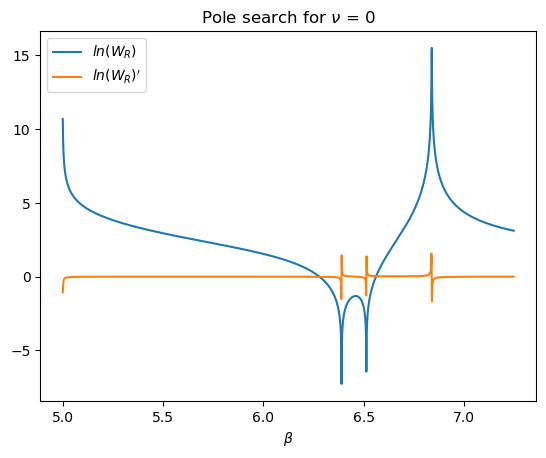

In [11]:
k2 = k0*np.ones(np.shape(Line_beta)) #w/c
k1 = n_f*k0*np.ones(np.shape(Line_beta)) #nf*w/c

Line_Eta1 = np.emath.sqrt(np.power(k1, 2) - np.power(Line_beta, 2))
Line_Eta2 = np.emath.sqrt(np.power(k2, 2) - np.power(Line_beta, 2))

result = abs(WR(nu_value, Line_beta, Line_Eta1, Line_Eta2, k1, k2))
#Poles when WR = 0, however to refine the pole search we can use log(WR)
#log(WR -> 0) -> -oo se we just have to grab the values for beta that make log(WR) < 0

result_l = np.log(result) 
result_dl = np.gradient(result_l)

#figure
plt.figure()
plt.plot(Line_beta, result_l, label=r"$ln(W_R)$")
plt.plot(Line_beta, result_dl, label=r"$ln(W_R)'$")
plt.legend(loc="upper left")
plt.xlabel(r'$\beta$')
plt.title("Pole search for " + r"$\nu$" + " = {}".format(nu_value))

In [12]:
#%% Pole calculation with gradient

beta_pole = []
pole_index = []

for index in range(len(result_dl)-1): 
    if result_l[index] < 0 and (result_dl[index] < 0 and result_dl[index+1] > 0): 
        # print("i:", index)
        # print("beta:", Line_beta[index])
            
        beta_pole.append(Line_beta[index])
        pole_index.append(index)
            
        #beta_pole.append([nu, Line_beta[index], index])
        
number_of_poles = len(beta_pole)
print("Number of poles for the guided mode : ", number_of_poles)

Number of poles for the guided mode :  2


The type of pole can be determined with the following:

*  If $\nu = 0$ we can have two types of modes, TE and TM:
    *  If $\displaystyle \frac{J_{0}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{0}(\bar{\eta}_1)} = \frac{H_{0}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{0}^{(1)}(\bar{\eta}_2) }$ the mode is TM.
    *  If $\displaystyle \frac{\bar{k}_{1}^{2} J_{0}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{0}(\bar{\eta}_1)} = \frac{\bar{k}_{2}^{2} H_{0}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{0}^{(1)}(\bar{\eta}_2) }$ the mode is TE.

## Principal value calculation

For a singularity at a finite number $b$ and at infinity:

$ PV[f(x)] = \displaystyle  \lim_{R \to \infty} \  \lim_{\epsilon \to 0^{+}} \left[ \int_{-R}^{b-\epsilon} f(x) dx +  \int_{b+\epsilon}^{R}  f(x) dx \right] $

The result of this procedure is the same as the original integral:

$PV[f(x)] \rightarrow \displaystyle \int_{-\infty}^{\infty} f(x) dx$ for $R \to \infty, \epsilon \to 0^{+}$.

For a complex-valued function : ...


In [13]:
rA = np.array([2, 0, 0]) #coordinate of the evaluation point (nm)
rB = np.array([2, 0, 10]) #coordinate of the source point (nm)

nu = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5] #terme dans la somme (mode)

I = 0

for nu_value in nu:
    
    result = abs(WR(nu_value, Line_beta, Line_Eta1, Line_Eta2, k1, k2))
    #Poles when WR = 0, however to refine the pole search we can use log(WR)
    #log(WR -> 0) -> -oo se we just have to grab the values for beta that make log(WR) < 0

    result_l = np.log(result) 
    result_dl = np.gradient(result_l)

    # #figure
    # plt.figure()
    # plt.plot(Line_beta, result_l, label=r"$ln(W_R)$")
    # plt.plot(Line_beta, result_dl, label=r"$ln(W_R)'$")
    # plt.legend(loc="upper left")
    # plt.xlabel(r'$\beta$')

    #%% Pole calculation with gradient

    beta_pole = []
    pole_index = []

    for index in range(len(result_dl)-1): 
        if result_l[index] < 0 and (result_dl[index] < 0 and result_dl[index+1] > 0): 
            # print("i:", index)
            # print("beta:", Line_beta[index])
            
            beta_pole.append(Line_beta[index])
            pole_index.append(index)
            
            #beta_pole.append([nu, Line_beta[index], index])
        
    number_of_poles = len(beta_pole)

    print("Number of poles for mode nu = {}: ".format(nu_value), number_of_poles)

    # TODO: how to identify which mode it is?

    #%% Principal value calculation for a given mode

    #Integral between k1 and k2.

    for i in range(len(Line_beta)-1):
            
        if i in pole_index:
            
            continue #avoid pole
        
        else:
            
            #print(i)
            
            I += (step/2) * (IGA(nu_value, Line_beta[i], k1[i], k2[i], rA, rB) \
                              +IGA(nu_value, Line_beta[i+1], k1[i+1], k2[i], rA, rB) ) #complex values


Number of poles for mode nu = -5:  0
Number of poles for mode nu = -4:  0
Number of poles for mode nu = -3:  1
Number of poles for mode nu = -2:  1
Number of poles for mode nu = -1:  3
Number of poles for mode nu = 0:  2
Number of poles for mode nu = 1:  3
Number of poles for mode nu = 2:  1
Number of poles for mode nu = 3:  1
Number of poles for mode nu = 4:  0
Number of poles for mode nu = 5:  0


In [14]:
TotalG = _G0(rA, rB, k0) + I

In [15]:
print(TotalG)

[[ 7.28108438e-03-1.91713277e-03j -3.24268451e-20+2.46460858e-19j
   9.77751191e-06-2.61575461e-05j]
 [ 1.77847341e-20-2.59368505e-19j  7.04352650e-03-1.83322606e-03j
   5.91083800e-20+4.10051319e-20j]
 [-9.77751191e-06+2.61575461e-05j  6.43989436e-20+4.07083052e-20j
  -7.09360633e-05-3.18735432e-04j]]


Not divergent...

**Question** :  What observable do I test?